# Computer Vision Problem

## Importing Libraries

In [0]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

## Loading Training images and labels from pickle files
Loading the data from the pickle files. <br/>
Converting the data into numpy arrays.<br/>
printing the shape of the data.<br/>

In [2]:
#loading
file = open("train_image.pkl",'rb')
train_images = pickle.load(file)
file.close()
file = open("train_label.pkl",'rb')
train_labels = pickle.load(file)
file.close()
#converting to numpy
train_images=np.array(train_images)
train_labels=np.array(train_labels)
#printing shape
train_images.shape,train_labels.shape

((8000, 784), (8000,))

## Reshaping to view the images

In [3]:
#reshaping
xtrain=np.reshape(train_images,(-1,28,28))
#printing shape and labels
print(xtrain.shape)
train_labels

(8000, 28, 28)


array([0, 0, 0, ..., 6, 6, 6])

In [4]:
#printing labels of different classes
train_labels[0],train_labels[2000],train_labels[4000],train_labels[6000]

(0, 2, 3, 6)

## Plotting a few images to get an idea of the dataset
4 images of each class are plotted to get an idea of the dataset. Each image has their label above the image.<br/>
It was noted the data set is of clothes.<br/>
Label 0 corresponds to T-shirts Halfsleeves or Sleeveless.<br/>
Label 2 corresponds to Fullsleeves T-shrits.<br/>
Label 3 corresponds to  Dresses.<br/>
Label 6 corresponds to  Shirts.<br/>
The above deductions are based purely on visual basis and may vary from the acutal labels.


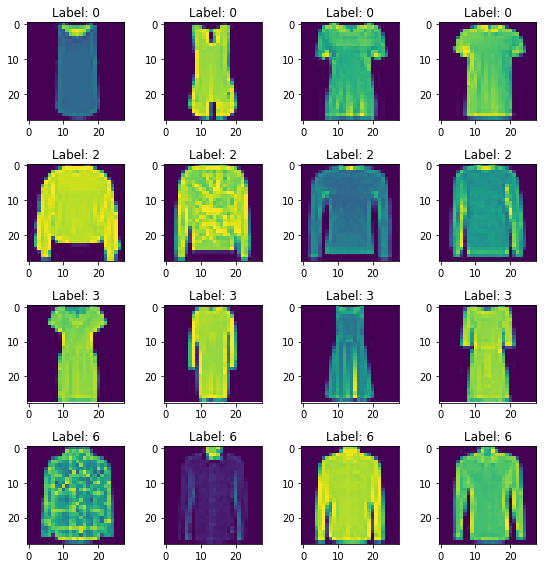

In [5]:
#plotting the images class wise
k=0
fig = plt.figure(figsize=(8,8))
for j in range(0,6001,2000):
  for i in range (1,5):
    k+=1
    sub=fig.add_subplot(4,4,k)
    sub.set_title("Label: " + str(train_labels[j+i]))
    plt.imshow(xtrain[j+i])
    plt.tight_layout()

## Data Augmentation
When we train a machine learning model, what we’re really doing is tuning its parameters such that it can map a particular input (say, an image) to some output (a label). As the number of parameters increase the training data should also increase proportionally to get good results.<br/><br/>
In this case the dataset of is of only 8000 images which is very less. Hence, we increase the size of the dataset by performing data augmentation.<br/><br/>
We perform **offline data augmentation** by **rotating** the images by **90, 180 & 270 degrees**. Hence, the dataset size increases **4 times** .

In [6]:
Xtrain = list(xtrain) 
Ytrain = list(train_labels)
#rotating the image,appending it and appending it's label
for i in range(xtrain.shape[0]):
    img = xtrain[i]
    rotated = np.rot90(img,1) # image rotation-(90 degrees)
    Xtrain.append(rotated) 
    Ytrain.append(train_labels[i]) 
    
    rotated = np.rot90(rotated,1) # image rotation-(180 degrees)
    Xtrain.append(rotated) 
    Ytrain.append(train_labels[i]) 
    
    rotated = np.rot90(rotated,1) # image rotation-(270 degrees)
    Xtrain.append(rotated) 
    Ytrain.append(train_labels[i])
    
#printing the length
print(len(Xtrain))
#converting to numpy
X_train = np.array(Xtrain) 
Y_train = np.array(Ytrain)
#printing the shape
print(X_train.shape)
print(Y_train.shape)

32000
(32000, 28, 28)
(32000,)


## Plotting the Augmented images

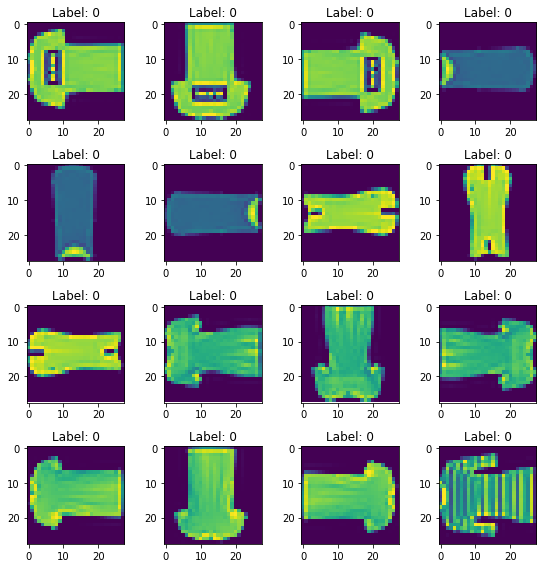

In [7]:
#plotting the augmented images to check the augmentation
fig = plt.figure(figsize=(8,8))
for i in range (1,17):
  sub=fig.add_subplot(4,4,i)
  sub.set_title("Label: " + str(Y_train[8000+i-1]))
  plt.imshow(X_train[8000+i-1])
  plt.tight_layout()

## Splitting The data into Training and Validation Data

In [8]:
#usinf sklearn's train test split to split the data
from sklearn.model_selection import train_test_split
Xtrain,Xval,Ytrain,Yval=train_test_split(X_train,Y_train,test_size=0.05)
Xtrain.shape,Xval.shape,Ytrain.shape,Yval.shape

((30400, 28, 28), (1600, 28, 28), (30400,), (1600,))

## Reshaping the Data into the form Required by Keras

In [0]:
Xtrain=Xtrain.reshape(-1,28,28,1)
Xval=Xval.reshape(-1,28,28,1)

## Max Normalising the images

In [0]:
Xtrain=Xtrain/255.0
Xval=Xval/255.0

## Converting the Classes/Labels to one hot using LabelBinarizer

In [11]:
#using sklearn's LabelBinarizer to encode the class labels
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
lb.fit(Ytrain)
print("Before LabelBinarizer: ")
print(Ytrain[0],Yval[0])
print(Ytrain.shape,Yval.shape)
Ytrain=lb.transform(Ytrain)
Yval=lb.transform(Yval)
print("After LabelBinarizer: ")
print(Ytrain[0],Yval[0])
print(Ytrain.shape,Yval.shape)
print("Classes: ")
print(lb.classes_)

Before LabelBinarizer: 
6 6
(30400,) (1600,)
After LabelBinarizer: 
[0 0 0 1] [0 0 0 1]
(30400, 4) (1600, 4)
Classes: 
[0 2 3 6]


# Model

We will build a **deep learning model** for the classification of images.<br/>
We build a **Convolutional Neural Network (CNN)** for this task. They are known to be extremely effective when working with images.<br/>
**Framework Used: Keras**


## Importing the Keras dependencies

In [12]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization

Using TensorFlow backend.


## Model Architecture
We use the sequential model from Keras to create our model.<br/>
**Layers used :-**<br/>
**Conv2d : ** It is the basic Convulation Layer in a CNN. We have used no, of units as 32, 64, 128 & 256 (in this order) in our architecture. All the Convolution layers have same padding and activation as relu.<br/>
**BatchNormalization: ** This is the layer which normalizes data from the previous layer. Theres one BatchNormalization layer after every Conv2d layer.<br/>
**MaxPooling2D: **It is the basic Maxpooling layer in a CNN. It reduces the size of the image by 2 (default value). Theres a maxpooling layer after each BatchNormalization layer.<br/>
**Flatten: **This layer helps to flatten the output of the Convulational network to a simple 2D array.<br/>
**Dropout: ** It is used to make the model more robust. <br/>
**Dense: **This is the standard Neural Network layer. We have used one Dense layer as the output layer of our network. It has 4 output units corresponding to each class and has activation as sigmoid.<br/>
**Activation used :- **<br/>
**Relu: ** It is generally used in Convolutional neural networks.The function and its derivative both are monotonic.<br/>
**Softmax: **It is used for multiclass classification as in this case.It returns the probabilities of each class and the target class will have the high probability.

In [13]:
 #model
model=Sequential()
model.add(Conv2D(32,5,padding="Same",input_shape=(28,28,1),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(padding="Same"))

model.add(Conv2D(64,5,padding="Same",activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(padding="Same"))

model.add(Conv2D(128,5,padding="Same",activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(padding="Same"))

model.add(Conv2D(256,5,padding="Same",activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(padding="Same",pool_size=4))

model.add(Dropout(rate=0.2))
model.add(Flatten())
model.add(Dense(4,activation="softmax"))
#compiling
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
#summary
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxP

## Training the model and saving the best weights according to Validation accuracy
We createe model checkpoints whenever the validation accuracy improves and save those weights. In this way if something unpredictable happens, we would still have the weights of our model saved with us.<br/>
While training the batch size has been increased. This is in accordance to new research which states that it is better practice to increase the batch size gradually as compared to the common practice of decaying learning rate because a) it requires less parameter updates i.e. number of steps, and b) trains faster — with similar test accuracies or learning curve.

In [0]:
import os
if "model_weights" not in os.listdir():
  os.mkdir("model_weights")
filepath="model_weights/zweights-{val_acc:.4f}.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=True, mode='max', period=1)
callbacks_list = [checkpoint]

In [15]:
model.fit(Xtrain,Ytrain,validation_data=(Xval,Yval),batch_size=64,epochs=10,callbacks = callbacks_list)

Instructions for updating:
Use tf.cast instead.
Train on 30400 samples, validate on 1600 samples
Epoch 1/10
30400/30400 [==============================] - 14s 446us/step - loss: 0.7231 - acc: 0.7452 - val_loss: 0.5544 - val_acc: 0.7925

Epoch 00001: val_acc improved from -inf to 0.79250, saving model to model_weights/zweights-0.7925.h5
Epoch 2/10
30400/30400 [==============================] - 12s 386us/step - loss: 0.4288 - acc: 0.8358 - val_loss: 0.3887 - val_acc: 0.8444

Epoch 00002: val_acc improved from 0.79250 to 0.84437, saving model to model_weights/zweights-0.8444.h5
Epoch 3/10
30400/30400 [==============================] - 11s 377us/step - loss: 0.3610 - acc: 0.8627 - val_loss: 0.3680 - val_acc: 0.8675

Epoch 00003: val_acc improved from 0.84437 to 0.86750, saving model to model_weights/zweights-0.8675.h5
Epoch 4/10
30400/30400 [==============================] - 12s 388us/step - loss: 0.3114 - acc: 0.8800 - val_loss: 0.3290 - val_acc: 0.8681

Epoch 00004: val_acc improved from

In [16]:
model.fit(Xtrain,Ytrain,validation_data=(Xval,Yval),batch_size=128,epochs=5,callbacks = callbacks_list)

Train on 30400 samples, validate on 1600 samples
Epoch 1/5
30400/30400 [==============================] - 8s 278us/step - loss: 0.0484 - acc: 0.9827 - val_loss: 0.4095 - val_acc: 0.8844

Epoch 00001: val_acc did not improve from 0.88500
Epoch 2/5
30400/30400 [==============================] - 8s 272us/step - loss: 0.0220 - acc: 0.9929 - val_loss: 0.4522 - val_acc: 0.8931

Epoch 00002: val_acc improved from 0.88500 to 0.89312, saving model to model_weights/zweights-0.8931.h5
Epoch 3/5
30400/30400 [==============================] - 8s 274us/step - loss: 0.0200 - acc: 0.9934 - val_loss: 0.5450 - val_acc: 0.8900

Epoch 00003: val_acc did not improve from 0.89312
Epoch 4/5
30400/30400 [==============================] - 8s 272us/step - loss: 0.0229 - acc: 0.9919 - val_loss: 0.5206 - val_acc: 0.8900

Epoch 00004: val_acc did not improve from 0.89312
Epoch 5/5
30400/30400 [==============================] - 8s 272us/step - loss: 0.0257 - acc: 0.9911 - val_loss: 0.5859 - val_acc: 0.8744

Epoch 0

In [17]:
model.fit(Xtrain,Ytrain,validation_data=(Xval,Yval),batch_size=256,epochs=5,callbacks = callbacks_list)

Train on 30400 samples, validate on 1600 samples
Epoch 1/5
30400/30400 [==============================] - 8s 259us/step - loss: 0.0144 - acc: 0.9955 - val_loss: 0.5097 - val_acc: 0.8938

Epoch 00001: val_acc improved from 0.89312 to 0.89375, saving model to model_weights/zweights-0.8938.h5
Epoch 2/5
30400/30400 [==============================] - 7s 234us/step - loss: 0.0034 - acc: 0.9993 - val_loss: 0.5667 - val_acc: 0.8981

Epoch 00002: val_acc improved from 0.89375 to 0.89812, saving model to model_weights/zweights-0.8981.h5
Epoch 3/5
30400/30400 [==============================] - 7s 235us/step - loss: 0.0012 - acc: 0.9998 - val_loss: 0.5533 - val_acc: 0.8938

Epoch 00003: val_acc did not improve from 0.89812
Epoch 4/5
30400/30400 [==============================] - 7s 234us/step - loss: 7.1739e-04 - acc: 1.0000 - val_loss: 0.5608 - val_acc: 0.9000

Epoch 00004: val_acc improved from 0.89812 to 0.90000, saving model to model_weights/zweights-0.9000.h5
Epoch 5/5
30400/30400 [==========

## Loading the model with the Best weights

In [18]:
#weights path
weights_path="model_weights"
model_weights=os.listdir(weights_path)
#initialising the best_weights file
best_weights="zweights-0.0000.h5"
for weights in model_weights:
  if(weights>best_weights):
    best_weights=weights
print(best_weights)
model.load_weights(weights_path+'/'+best_weights)

zweights-0.9012.h5


## Loading the test images from the  pickle file

In [19]:
file = open("test_image.pkl",'rb')
test_images = pickle.load(file)
file.close()
#pritning the length
len(test_images)

2000

## Reshaping the images and applying max normalization

In [20]:
#converting to numpy array
test_images=np.array(test_images)
#reshaping
xtest=np.reshape(test_images,(-1,28,28,1))
#applying max normalization
xtest=xtest/255.0
#pritning final shape
xtest.shape

(2000, 28, 28, 1)

## Predicting 

In [21]:
#predicting
predictions=model.predict(xtest)
#printing the predictions
predictions

array([[9.9999988e-01, 1.2776852e-12, 3.4043413e-08, 1.1330308e-07],
       [9.9828374e-01, 1.6737964e-06, 1.1633662e-05, 1.7030014e-03],
       [9.9789113e-01, 1.6770791e-08, 1.6875429e-06, 2.1071539e-03],
       ...,
       [3.2943749e-08, 9.4930712e-08, 5.9040364e-08, 9.9999988e-01],
       [2.2124757e-17, 8.9623349e-16, 1.2813824e-16, 1.0000000e+00],
       [1.8511562e-15, 9.2961545e-19, 5.1419262e-16, 1.0000000e+00]],
      dtype=float32)

## Getting the Predictions into the required form

In [22]:
#transforming the predicitons using the LabelBinarizer's inverse transformation
predictions=lb.inverse_transform(predictions)
#forming an np zeros array
final_predictions=np.zeros((predictions.shape[0],2))
#forming the final predictions in the required form
for ix in range(predictions.shape[0]):
  final_predictions[ix][0]=ix
  final_predictions[ix][1]=predictions[ix]
#printing the final predictions
final_predictions

array([[0.000e+00, 0.000e+00],
       [1.000e+00, 0.000e+00],
       [2.000e+00, 0.000e+00],
       ...,
       [1.997e+03, 6.000e+00],
       [1.998e+03, 6.000e+00],
       [1.999e+03, 6.000e+00]])

## Saving the predicitons to CSV

In [0]:
#storing the predictions in a csv file
import pandas as pd
pd.DataFrame(final_predictions).to_csv("Amrit_Khera.csv",header=['image_index','class'],index=False)

In [0]:
!rm -R "model_weights"